<a href="https://colab.research.google.com/github/King-of-Haskul/HackJMI2-CheemsGamg/blob/master/AntiSpoof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp drive/MyDrive/Datasets/Detectedface.rar dataset/

In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("dataset/Detectedface.rar", outdir="dataset")
!ls dataset

     |████████████████████████████████| 77 kB 2.9 MB/s 
patool: Extracting dataset/Detectedface.rar ...
patool: running /usr/bin/unrar x -- /content/dataset/Detectedface.rar
patool:     with cwd='dataset'
patool: ... dataset/Detectedface.rar extracted to `dataset'.
Detectedface  Detectedface.rar	train  val


In [ ]:
import os
import shutil

train_dir = 'dataset/train'
val_dir = 'dataset/val'
dr = ['real', 'fake']
for d in dr:
  for f in [train_dir, val_dir]:
    path = os.path.join(f, d)
    if not os.path.isdir(path):
      os.makedirs(path)

In [ ]:
root_fake = 'dataset/Detectedface/ImposterFace'
root_real = 'dataset/Detectedface/ClientFace'
for dir in (os.listdir(root_fake)):
  dir_pth = os.path.join(root_fake, dir)
  for img in os.listdir(dir_pth):
      pth = os.path.join(dir_pth, img)
      shutil.move(pth, os.path.join('dataset/train/fake', img))

for dir in (os.listdir(root_real)):
  dir_pth = os.path.join(root_real, dir)
  for img in os.listdir(dir_pth):
      pth = os.path.join(dir_pth, img)
      shutil.move(pth, os.path.join('dataset/train/real', img))

In [ ]:
import random
real_imgs = os.listdir('dataset/train/real')
random.shuffle(real_imgs)
val_real = real_imgs[:1009]
for img in val_real:
  shutil.move(os.path.join('dataset/train/real', img), os.path.join('dataset/val/real', img))

fake_imgs = os.listdir('dataset/train/fake')
random.shuffle(fake_imgs)
val_fake = fake_imgs[:1514]
for img in val_fake:
  shutil.move(os.path.join('dataset/train/fake', img), os.path.join('dataset/val/fake', img))

In [ ]:
len(os.listdir('dataset/val/real'))

1009

In [ ]:
os.makedirs('drive/MyDrive/Datasets/NUAA/train')
os.makedirs('drive/MyDrive/Dataset/NUAA/fake')
!cp -R dataset/train drive/MyDrive/Datasets/NUAA/train
!cp -R dataset/val drive/MyDrive/Datasets/NUAA/fake

In [ ]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-ik15vll3
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-ik15vll3
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8325 sha256=226401ad80947be584511f050c5c5fa7a9cfe903657e7f7b72c9adb24327569c
  Stored in directory: /tmp/pip-ephem-wheel-cache-c7n7iv73/wheels/08/df/86/0225d44647ab2256dbf1e006823288fe9cc86367a056e6ea2c
Successfully built keras-vggface


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import glob
example_img = glob.glob('dataset/train/fake/*')[0]

In [ ]:
import numpy as np
import keras
from keras import preprocessing
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
import cv2
def process(img):
  #ycr = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
  #luv = cv2.cvtColor(img, cv2.COLOR_RGB2Luv)
  return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = 'dataset/train'
val_path = 'dataset/val'
train_batches = ImageDataGenerator(rescale = 1./255, preprocessing_function=process) \
    .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['real', 'fake'], batch_size=128)

val_batches = ImageDataGenerator(rescale=1./255, preprocessing_function=process) \
    .flow_from_directory(directory=val_path, target_size=(224, 224), classes=['real', 'fake'], batch_size=32)

Found 10091 images belonging to 2 classes.
Found 2523 images belonging to 2 classes.


In [ ]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

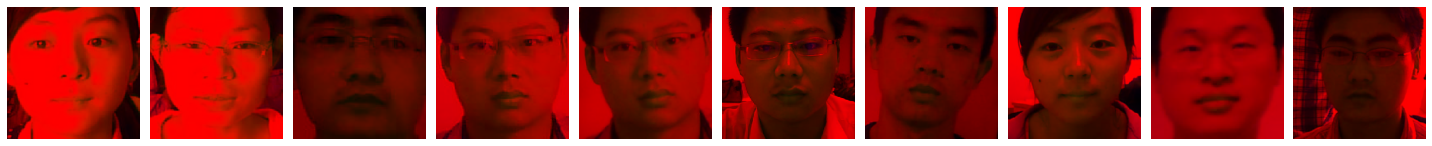

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs)
print(labels)

In [ ]:
!pip install keras_application
!pip install keras_preprocessing

ERROR: Could not find a version that satisfies the requirement keras_application (from versions: none)
ERROR: No matching distribution found for keras_application
     |████████████████████████████████| 42 kB 576 kB/s 


In [ ]:
import keras
from keras_preprocessing import image
from keras_vggface.vggface import VGGFace
from keras import Model

vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))
vgg_model.trainable = True
tf.executing_eagerly()

True

In [ ]:
hidden_dim = 1024
nb_class = 2

last_layer = vgg_model.get_layer('pool5').output
x = Flatten(name='flatten')(last_layer)
x = Dense(hidden_dim, activation='relu', name='fc6')(x)
x = Dense(hidden_dim, activation='relu', name='fc7')(x)
out = Dense(nb_class, activation='softmax', name='fc8')(x)
custom_vgg_model = Model(vgg_model.input, out)

In [ ]:
custom_vgg_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
os.makedirs('drive/MyDrive/Datasets/AntiSpoof/FModel1')
checkpoint_filepath='drive/MyDrive/Datasets/AntiSpoof/FModel1'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
custom_vgg_model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=val_batches,
    validation_steps=len(val_batches),
    epochs=20,
    verbose=1,
    callbacks=[model_checkpoint_callback]
)

In [ ]:
from keras.models import load_model

m1 = load_model('drive/MyDrive/Datasets/AntiSpoof/Model1')

In [ ]:
!git clone https://github.com/hashes-jmi/HackJMI2-CheemsGamg

Cloning into 'HackJMI2-CheemsGamg'...
remote: Enumerating objects: 750, done.
remote: Counting objects: 100% (750/750), done.
remote: Compressing objects: 100% (634/634), done.
remote: Total 750 (delta 133), reused 681 (delta 97), pack-reused 0
Receiving objects: 100% (750/750), 65.75 MiB | 25.39 MiB/s, done.
Resolving deltas: 100% (133/133), done.


In [ ]:
old_val_batches = ImageDataGenerator(rescale=1./255, preprocessing_function=process) \
    .flow_from_directory(directory='HackJMI2-CheemsGamg/data/train', target_size=(224,224), classes=['real', 'fake'], batch_size=10)

val_b = ImageDataGenerator(rescale=1./255, preprocessing_function=process) \
    .flow_from_directory(directory='HackJMI2-CheemsGamg/data/val', target_size=(224,224), classes=['real', 'fake'], batch_size=16)

Found 223 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [ ]:
m1.evaluate(old_val_batches)

7/7 [==============================] - 11s 2s/step - loss: 1.3146 - accuracy: 0.6413


[1.3146474361419678, 0.6412556171417236]

In [ ]:
m1.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
m1.fit(x=old_val_batches,
    steps_per_epoch=len(old_val_batches),
    validation_data=val_batches,
    validation_steps=len(val_batches),
    epochs=5,
    verbose=1,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/5
14/14 [==============================] - 23s 2s/step - loss: 0.0390 - accuracy: 0.9910 - val_loss: 0.0024 - val_accuracy: 0.9988
Epoch 2/5
14/14 [==============================] - 23s 2s/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9988
Epoch 3/5
14/14 [==============================] - 23s 2s/step - loss: 0.0367 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9988
Epoch 4/5
14/14 [==============================] - 23s 2s/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9988
Epoch 5/5
14/14 [==============================] - 23s 2s/step - loss: 0.0350 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9988


In [ ]:
m1.evaluate(train_batches)

79/79 [==============================] - 69s 876ms/step - loss: 0.0035 - accuracy: 0.9989


[0.0034629576839506626, 0.9989098906517029]

In [ ]:
m1.evaluate(val_b)

2/2 [==============================] - 0s 113ms/step - loss: 0.0263 - accuracy: 1.0000


[0.026336394250392914, 1.0]

In [ ]:
from keras.models import save_model
os.makedirs('drive/MyDrive/Datasets/AntiSpoof/Best')
m1.save('drive/MyDrive/Datasets/AntiSpoof/Best/clf.h5', save_format='h5')

In [ ]:

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to dataset/test.png


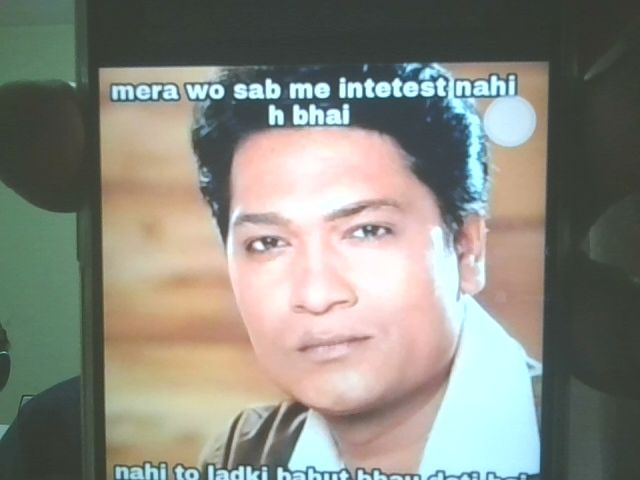

In [ ]:
from IPython.display import Image
try:
  filename = take_photo("dataset/test.png")
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

img_path = 'dataset/test.png'
img = Image.open(img_path)
img = img.resize((224, 224), Image.ANTIALIAS)
img_arr = np.expand_dims(img_to_array(img), axis=0)
datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=process)

In [ ]:
count = 0
for batch in datagen.flow(img_arr, batch_size=1):
  img = batch[0]
  count += 1
  if count > 0:
    break

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
pre = m1.predict(np.expand_dims(img, axis=0))
np.argmax(pre)

1

In [ ]:
imgs, labels = next(old_val_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

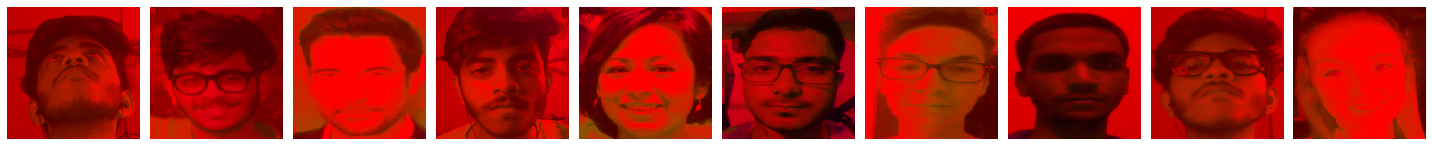

In [ ]:
plotImages(imgs)

In [ ]:
for label in labels:
  print(np.argmax(label), end = ' ')

0 1 1 0 1 1 1 0 0 1 

In [ ]:
pred = m1.predict(imgs)

In [ ]:
for pre in pred:
  print(np.argmax(pre), end = ' ')

0 1 1 0 1 1 1 0 0 1 

In [ ]:
pred

array([[9.8738933e-01, 1.2610656e-02],
       [1.0525376e-01, 8.9474618e-01],
       [5.9906601e-05, 9.9994004e-01],
       [9.9993920e-01, 6.0768638e-05],
       [4.9321348e-04, 9.9950683e-01],
       [2.4681922e-02, 9.7531801e-01],
       [3.4916771e-03, 9.9650830e-01],
       [9.7713476e-01, 2.2865253e-02],
       [9.6724617e-01, 3.2753758e-02],
       [1.5055866e-04, 9.9984944e-01]], dtype=float32)